In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Input Variables for SHO Forward Euler Solver
x=float(0) # pos
v=float(0) # vel
x_bar=[x,v]
m=float(0) # mass
g=float(0) # grav. dissipation
k=float(0) # spring constant
b=float(0) # friction
t_0=float(0) # initial time
t=float(0) # cur. time
dt=float(0) # timestep 

In [51]:
# For a Simple Harmonic Osciallator
def forward_euler(x, v, m, g, k, b, dt):
    x_ = v
    v_ = g-x*(k/m)-v*(b/m)
    x__bar = [x_*dt,v_*dt]
    x_bar=[x,v]
    output = [(x_*dt)+x, (v_*dt)+v]
    return output

In [15]:
x=-1.0
v=-2.0
out = [x, v]

out=forward_euler(x=out[0], v=out[1], m=0.5, g=0, k=2, b=0, dt=0.1)
print(out)

[-1.2, -1.6]


In [155]:
dt=0.05
t = 10*dt
l = t/dt
x=-1.0
v=-2.0
out = [x, v]
data=[out]
for i in range(int(l)):
    out = forward_euler(x=out[0], v=out[1], m=1, g=0, k=2, b=0, dt=dt)
    """ if i % 0.5 ==0:
        print(f"{(i*dt)+dt:.2f} {' '.join([f'{out[j]:.4f}' for j in range(len(out))])}") """
    data.append(out)
data=np.array(data)
print(data[-1])

[-1.72085228 -0.61981906]


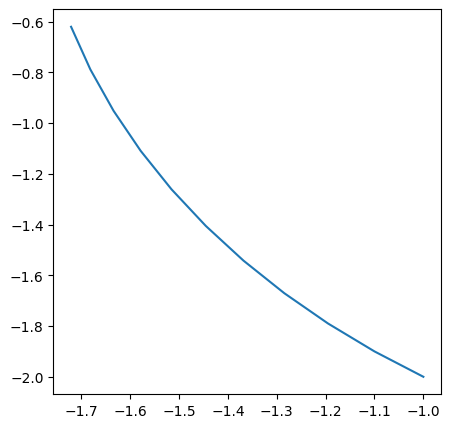

In [108]:
fig,ax=plt.subplots(figsize=(5,5))

ax.plot(data.T[0], data.T[1])
""" ax.set_xlim(-100,100)
ax.set_ylim(-100,100) """
plt.show()

In [120]:
def forward_euler(x, v, m, g, k, b, dt):
    #  returns slope at [x,v]
    x_ = v
    v_ = g-x*(k/m)-v*(b/m)
    output = [(x_*dt)+x, (v_*dt)+v]
    return output

def backwards_euler(x, v, m, g, k, b, dt):
    out=[x,v]
    output=out
    step=forward_euler(x=out[0], v=out[1], m=0.5, g=0, k=2, b=0, dt=dt)
    x_ = step[1]
    v_ = g-step[0]*(k/m)-step[1]*(b/m) 
    d_step = [dt*((step[0]+x_)*0.5),dt*((step[1]+v_)*0.5)]
    
    output[0] = d_step[0] + x
    output[1] = d_step[1] + v
    return output

In [156]:
_data=data

[-1.63273349 -0.84576549]


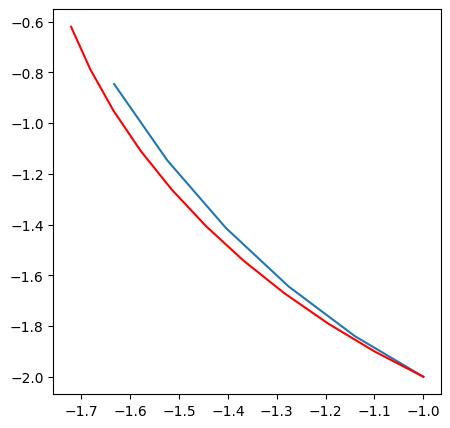

In [157]:
dt=0.1
n=5
t = n*dt
x=-1.0
v=-2.0
out = [x, v]

data=[out]
for i in range(int(n)):
    out = backwards_euler(x=out[0], v=out[1], m=0.5, g=0, k=2, b=0, dt=dt)
    """ if i % 0.5 ==0:
        print(f"{(i*dt)+dt:.2f} {' '.join([f'{out[j]:.4f}' for j in range(len(out))])}") """
    data.append(out)
data=np.array(data)
#print(data)
fig,ax=plt.subplots(figsize=(5,5))
ax.plot(data.T[0], data.T[1])
ax.plot(_data.T[0], _data.T[1], color='red')
""" ax.set_xlim(-100,100)
ax.set_ylim(-100,100) """
print(data[-1])
plt.show()

In [147]:
def forward_euler_trapezoid(x, v, m, g, k, b, dt):
    #  returns slope at [x,v]
    x_ = v
    v_ = g-x*(k/m)-v*(b/m)
    output = [(x_*dt)+x, (v_*dt)+v]
    return output, x_, v_

def trapezoidal(x, v, m, g, k, b, dt):
   # xbar(t+dt) = xbar(t) + dt/2[f(xbar(t)) + f(xbar_1fe(t+dt))]
    out=[x,v]
    output=out

    step,x_,v_=forward_euler_trapezoid(x=out[0], v=out[1], m=0.5, g=0, k=2, b=0, dt=dt)
    x__ = step[1]
    v__ = g-step[0]*(k/m)-step[1]*(b/m)
    d_step = [(x__+x_)*(dt/2), (v__+v_)*(dt/2)]
    d_step[0] += x 
    d_step[1] += v 
    output = d_step
    return output

[-1.38144361  0.60700444]


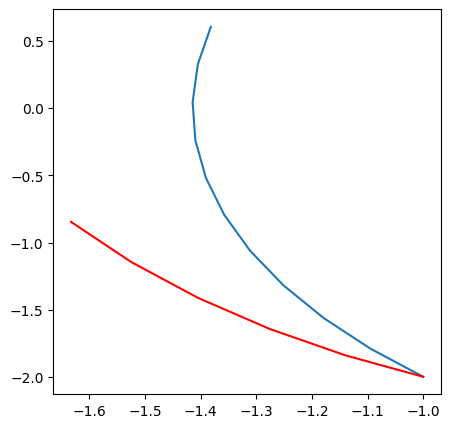

In [158]:
dt=0.05
n=10
t = n*dt
x=-1.0
v=-2.0
out = [x, v]
_data=data
data=[out]
for i in range(int(n)):
    out = trapezoidal(x=out[0], v=out[1], m=0.5, g=0, k=2, b=0, dt=dt)
    """ if i % 0.5 ==0:
        print(f"{(i*dt)+dt:.2f} {' '.join([f'{out[j]:.4f}' for j in range(len(out))])}") """
    data.append(out)
data=np.array(data)
#print(data)
fig,ax=plt.subplots(figsize=(5,5))
ax.plot(data.T[0], data.T[1])
ax.plot(_data.T[0], _data.T[1], color='red')
""" ax.set_xlim(-100,100)
ax.set_ylim(-100,100) """
print(data[-1])
plt.show()